# using neural network to make prediction of whether patient has diabetes

In [28]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Input

In [30]:
data=pd.read_csv('data/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<Axes: xlabel='Outcome'>

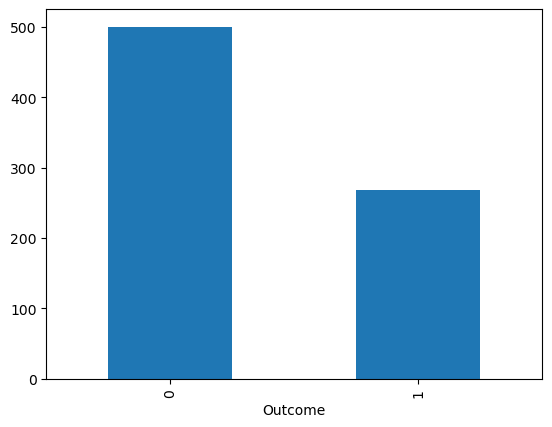

In [32]:
import seaborn as sns

data['Outcome'].value_counts().plot(kind='bar')

# data processing

In [67]:
# split data into X and Y for input and output respectively

# everything except response is tkan into the predictor
predictors=data.iloc[:,0:8].values
response=data.iloc[:,8].values

In [80]:
# split data into train and test sets

X_train,X_test,y_train,y_test=train_test_split(predictors,response,test_size=0.2,random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(614, 8) (614,)
(154, 8) (154,)


# training the neural network

# sequential API allows to build keras model layer by layer

In [83]:
# defining the keras model

# first hidden layer
# dense is full connected neural network layer
# 8 independent columns i.e. dimensions
# relu for avoiding extreme gradients at both ends
# output layer; value ranges between 0 and 1
kerasmodel = Sequential([
    Input(shape=(8,)),  # Explicit input layer
    Dense(12, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [85]:
# compile model
kerasmodel.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [87]:
# fit model
model=kerasmodel.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_test,y_test),
    epochs=150,batch_size=10
)

Epoch 1/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - accuracy: 0.6401 - loss: 7.6940 - val_accuracy: 0.6104 - val_loss: 1.7546
Epoch 2/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6051 - loss: 1.5999 - val_accuracy: 0.6234 - val_loss: 1.0025
Epoch 3/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6391 - loss: 1.0538 - val_accuracy: 0.6039 - val_loss: 0.9134
Epoch 4/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6558 - loss: 0.9659 - val_accuracy: 0.6364 - val_loss: 0.8383
Epoch 5/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6780 - loss: 0.7936 - val_accuracy: 0.6039 - val_loss: 0.8715
Epoch 6/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6407 - loss: 0.8282 - val_accuracy: 0.6558 - val_loss: 0.7883
Epoch 7/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6364 - loss: 0.8097 - val_accuracy: 0.6688 - val_loss: 0.7500
Epoch 8/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6589 - loss: 0.7853 - val_accuracy: 0.6364 -

In [97]:
# training accuracy
_,train_accuracy=kerasmodel.evaluate(X_train,y_train)
print("Training accuracy: %.3f"%(train_accuracy*100))

#testing accuracy
_, test_accuracy=kerasmodel.evaluate(X_test,y_test)
print("Testing accuracy: %.3f"%(test_accuracy*100))

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7893 - loss: 0.4471
Training accuracy: 77.687
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7133 - loss: 0.5985
Testing accuracy: 74.026


In [103]:
# testing accuracy using skleran library
from sklearn.metrics import accuracy_score

y_pred=(kerasmodel.predict(X_test)>0.5).astype("int32")
print(f"Test accuracy (sklearn): {accuracy_score(y_test, y_pred):.3f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Test accuracy (sklearn): 0.740


# 74% accuracy can be considered a good score as the data is limited both in terms of quality and quantity, the model can be improved by adding more layers